# Bike Sharing Assignment

### Data Understanding
BoomBikes, a prominent US bike-sharing provider, grapples with revenue downturns during the COVID-19 pandemic. To navigate this challenge, they aim to discern the key drivers of bike demand, informing their business strategy. Leveraging a dataset encompassing daily bike demand and diverse factors, they strive to pinpoint influential predictors. My task involved constructing a multiple linear regression model to forecast bike demand and assessing its accuracy via the R-squared metric. This endeavor equips BoomBikes with insights to refine their approach and align with customer needs in the post-pandemic landscape.

In [1]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Step 1: Reading and understanding the data

In [3]:
# Reading the given csv file
df_day = pd.read_csv('day.csv')

In [4]:
# Viewing some sample records
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df_day.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [6]:
# Checking the shape of the dataframe
df_day.shape

(730, 16)

In [7]:
# Checking the details of numerical data
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Viewing the datatypes of the dataframe
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


The dataset comprises 730 rows and 16 columns, with no missing values present across any of the columns.

### Step 2: Data Preparation

In [9]:
# Dropping the unwanted columns
df_day.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

- "Instant" is a unique row identifier, while "dteday" is omitted as its temporal aspects are covered by "mnth," "yr," and "weekday." Additionally, day-to-day demand fluctuations are disregarded for this analysis.
- "Casual" and "registered" variables, though they straightforwardly contribute to the target variable "cnt" (count of total rentals), are not available during prediction. Moreover, their inclusion in the analysis can lead to data leakage.

In [10]:
# Encoding/Mapping the season column
df_day.season = df_day.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [11]:
# Encoding/Mapping the mnth column
df_day.mnth = df_day.mnth.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct',
                              11:'Nov', 12:'Dec'})

In [12]:
# Encoding/Mapping the weekday column
df_day.weekday = df_day.weekday.map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thr', 5:'Fri', 6:'Sat'})

In [13]:
# Encoding/Mapping the weathersit column
df_day.weathersit = df_day.weathersit.map({1:'Sunny', 2:'Hazy', 3:'Drizzle', 4:'Downpour'})

In [14]:
# Viewing the dataset again after the changes
df_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Hazy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Hazy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Sunny,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thr,1,Sunny,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Sunny,9.305237,11.46350,43.6957,12.522300,1600


### Step 3: Visualising the data

In [15]:
# importing the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

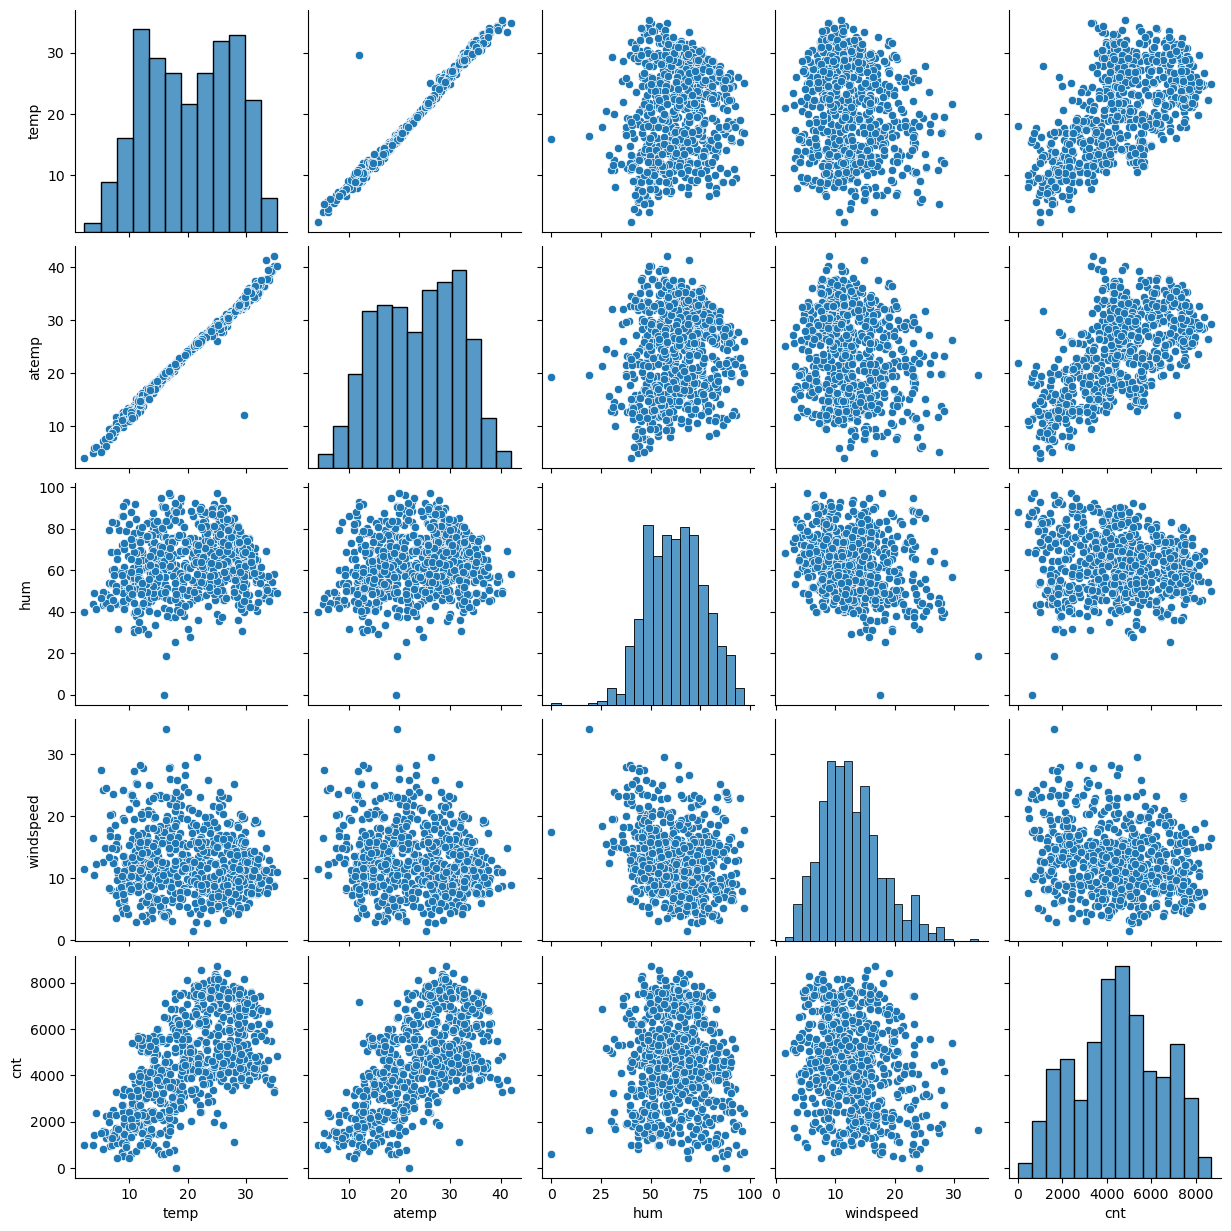

In [16]:
# Visualising Numeric Variables
bike_nm = df_day[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

sns.pairplot(bike_nm)
plt.show()

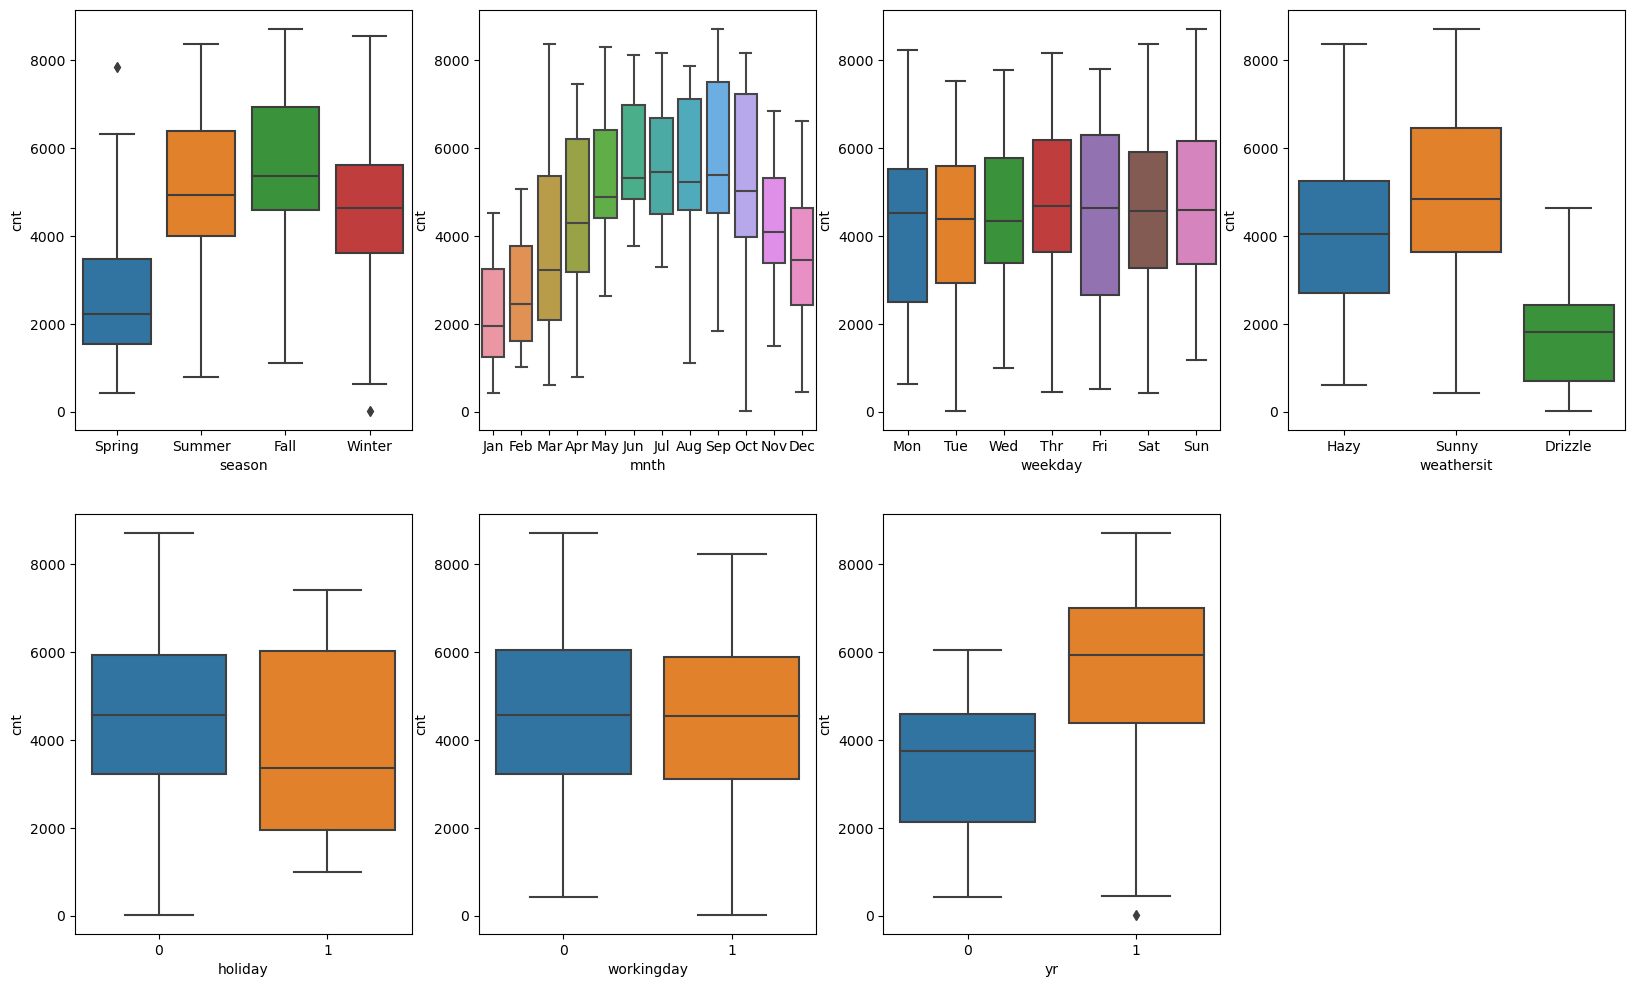

In [17]:
# Visualising Categorical Variables
plt.figure(figsize=(20,12))

plt.subplot(2,4,1)
sns.boxplot(x='season', y='cnt', data=df_day)

plt.subplot(2,4,2)
sns.boxplot(x='mnth', y='cnt', data=df_day)

plt.subplot(2,4,3)
sns.boxplot(x='weekday', y='cnt', data=df_day)

plt.subplot(2,4,4)
sns.boxplot(x='weathersit', y='cnt', data=df_day)

plt.subplot(2,4,5)
sns.boxplot(x='holiday', y='cnt', data=df_day)

plt.subplot(2,4,6)
sns.boxplot(x='workingday', y='cnt', data=df_day)

plt.subplot(2,4,7)
sns.boxplot(x='yr', y='cnt', data=df_day)

plt.show()

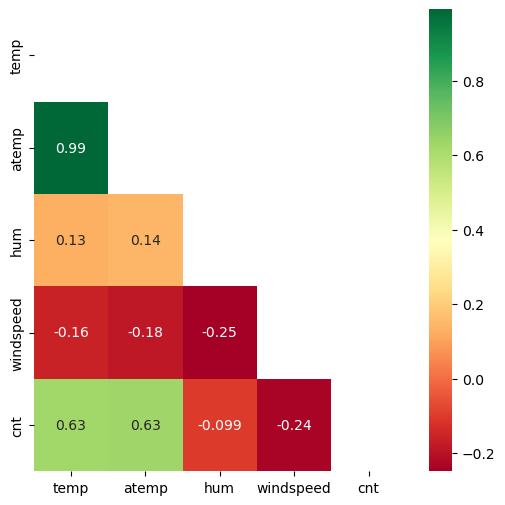

In [18]:
# Checking the correlation between the numerical variables

plt.figure(figsize=(6, 6))
matrix = np.triu(df_day[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr())
sns.heatmap(df_day[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap="RdYlGn", mask=matrix)
plt.show()

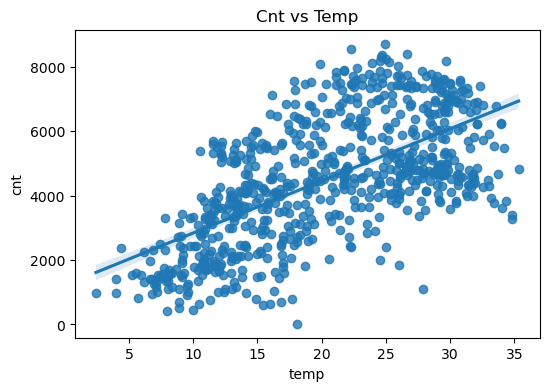

In [19]:
plt.figure(figsize=(6,4))
plt.title("Cnt vs Temp")
sns.regplot(data=df_day,y="cnt",x="temp")
plt.show()

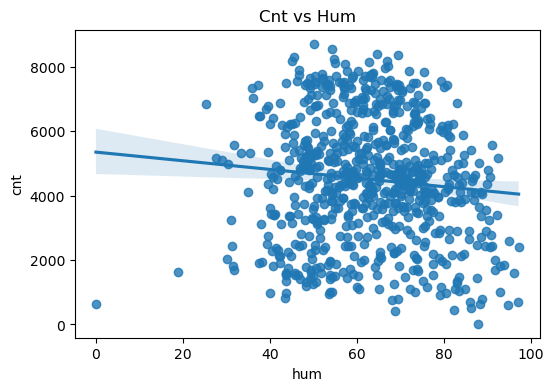

In [20]:
plt.figure(figsize=(6,4))
plt.title('Cnt vs Hum')
sns.regplot(data=df_day, y='cnt', x='hum')
plt.show()

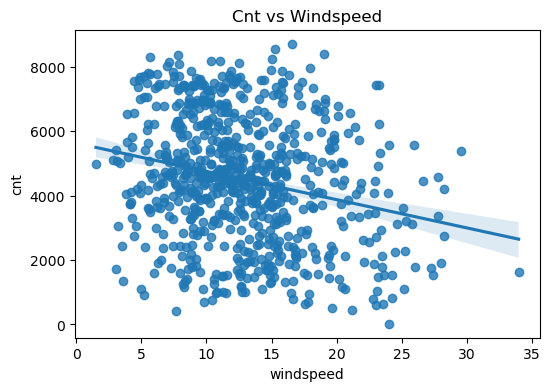

In [21]:
plt.figure(figsize=(6,4))
plt.title('Cnt vs Windspeed')
sns.regplot(data=df_day, y='cnt', x='windspeed')
plt.show()

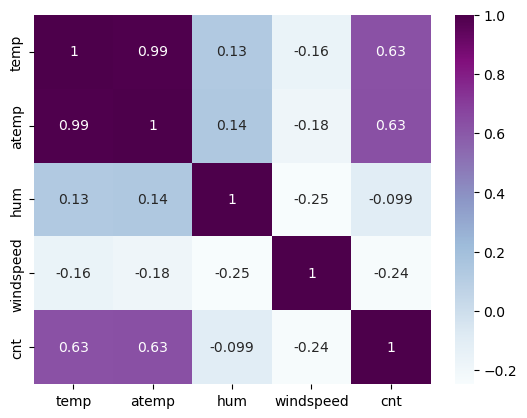

In [22]:
# Checking continuous variables relationship with each other

sns.heatmap(df_day[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuPu', annot = True)
plt.show()

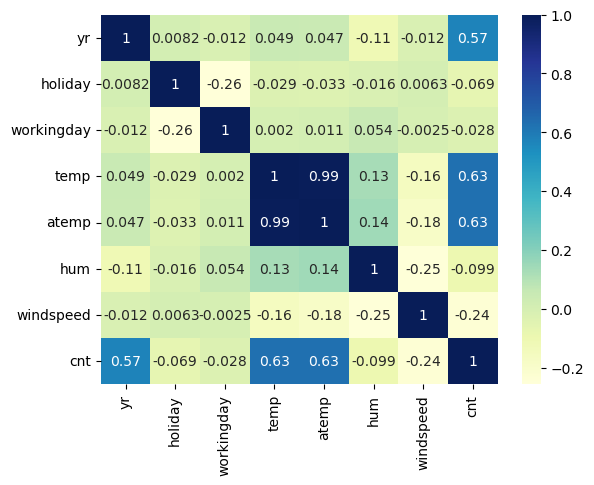

In [23]:
# Correlation for numeric variables
num_cols = df_day.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
cor = num_cols.corr()

# Plot heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

### Dummy Variables

In [24]:
# Getting the dummy variables for the features 'month', 'weekday', 'weathersit', 'season' and store it in new variables

df_month = pd.get_dummies(df_day.mnth, drop_first=True, dtype=int)

df_week = pd.get_dummies(df_day.weekday, drop_first=True, dtype=int)

df_weather = pd.get_dummies(df_day.weathersit, drop_first=True, dtype=int)

df_season = pd.get_dummies(df_day.season, drop_first=True, dtype=int)

In [25]:
# Checking what the datasets looks like
df_month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [26]:
# Checking what the datasets looks like
df_week.head()

,Mon,Sat,Sun,Thr,Tue,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [27]:
# Checking what the datasets looks like
df_weather.head()

,Hazy,Sunny
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [28]:
# Checking what the datasets looks like
df_season.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [29]:
# Adding the results to the original day dataframe
df_day = pd.concat([df_day, df_month, df_week, df_weather, df_season], axis=1)

In [30]:
df_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thr,Tue,Wed,Hazy,Sunny,Spring,Summer,Winter
0,Spring,0,Jan,0,Mon,1,Hazy,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
1,Spring,0,Jan,0,Tue,1,Hazy,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
2,Spring,0,Jan,0,Wed,1,Sunny,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
3,Spring,0,Jan,0,Thr,1,Sunny,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
4,Spring,0,Jan,0,Fri,1,Sunny,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [31]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  Aug         730 non-null    int32  
 13  Dec         730 non-null    int32  
 14  Feb         730 non-null    int32  
 15  Jan         730 non-null    int32  
 16  Jul         730 non-null    int32  
 17  Jun         730 non-null    int32  
 18  Mar         730 non-null    int32  
 19  May         730 non-null    i

In [32]:
# Dropping unnecessary columns as we have created the dummies for it
df_day.drop(['mnth', 'weekday', 'weathersit', 'season'], axis=1, inplace=True)

In [33]:
df_day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thr,Tue,Wed,Hazy,Sunny,Spring,Summer,Winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [34]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   Aug         730 non-null    int32  
 9   Dec         730 non-null    int32  
 10  Feb         730 non-null    int32  
 11  Jan         730 non-null    int32  
 12  Jul         730 non-null    int32  
 13  Jun         730 non-null    int32  
 14  Mar         730 non-null    int32  
 15  May         730 non-null    int32  
 16  Nov         730 non-null    int32  
 17  Oct         730 non-null    int32  
 18  Sep         730 non-null    int32  
 19  Mon         730 non-null    i

##### Checking for missing values after data preparation

In [35]:
df_day.isnull().sum()

yr            0
holiday       0
workingday    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
Aug           0
Dec           0
Feb           0
Jan           0
Jul           0
Jun           0
Mar           0
May           0
Nov           0
Oct           0
Sep           0
Mon           0
Sat           0
Sun           0
Thr           0
Tue           0
Wed           0
Hazy          0
Sunny         0
Spring        0
Summer        0
Winter        0
dtype: int64

Our dataset is free from any missing values, meaning that every piece of data is present and accounted for. This ensures the integrity and completeness of our dataset for analysis.

### Step 4: Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split.

In [36]:
# importing libraries
from sklearn.model_selection import train_test_split

# Splitting the dataframe into Train and Test
np.random.seed(0)
df_train, df_test = train_test_split(df_day, train_size=0.7, test_size=0.3, random_state=100)

In [37]:
# Checking the shape of training dataset
df_train.shape

(510, 30)

In [38]:
# Checking the shape of testing dataset
df_test.shape

(219, 30)

In [39]:
# import the necessary library
from sklearn.preprocessing import MinMaxScaler

# Using MinMaxScaler to Rescaling the features
scaler = MinMaxScaler()

In [40]:
df_day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thr,Tue,Wed,Hazy,Sunny,Spring,Summer,Winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [41]:
# Apply scaler to all the columns except the 'yes-no' and 'dummy' variables
n_vars= ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[n_vars] =scaler.fit_transform(df_train[n_vars])

In [42]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thr,Tue,Wed,Hazy,Sunny,Spring,Summer,Winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0


In [43]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thr,Tue,Wed,Hazy,Sunny,Spring,Summer,Winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.343137,0.627451,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475223,0.483958,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


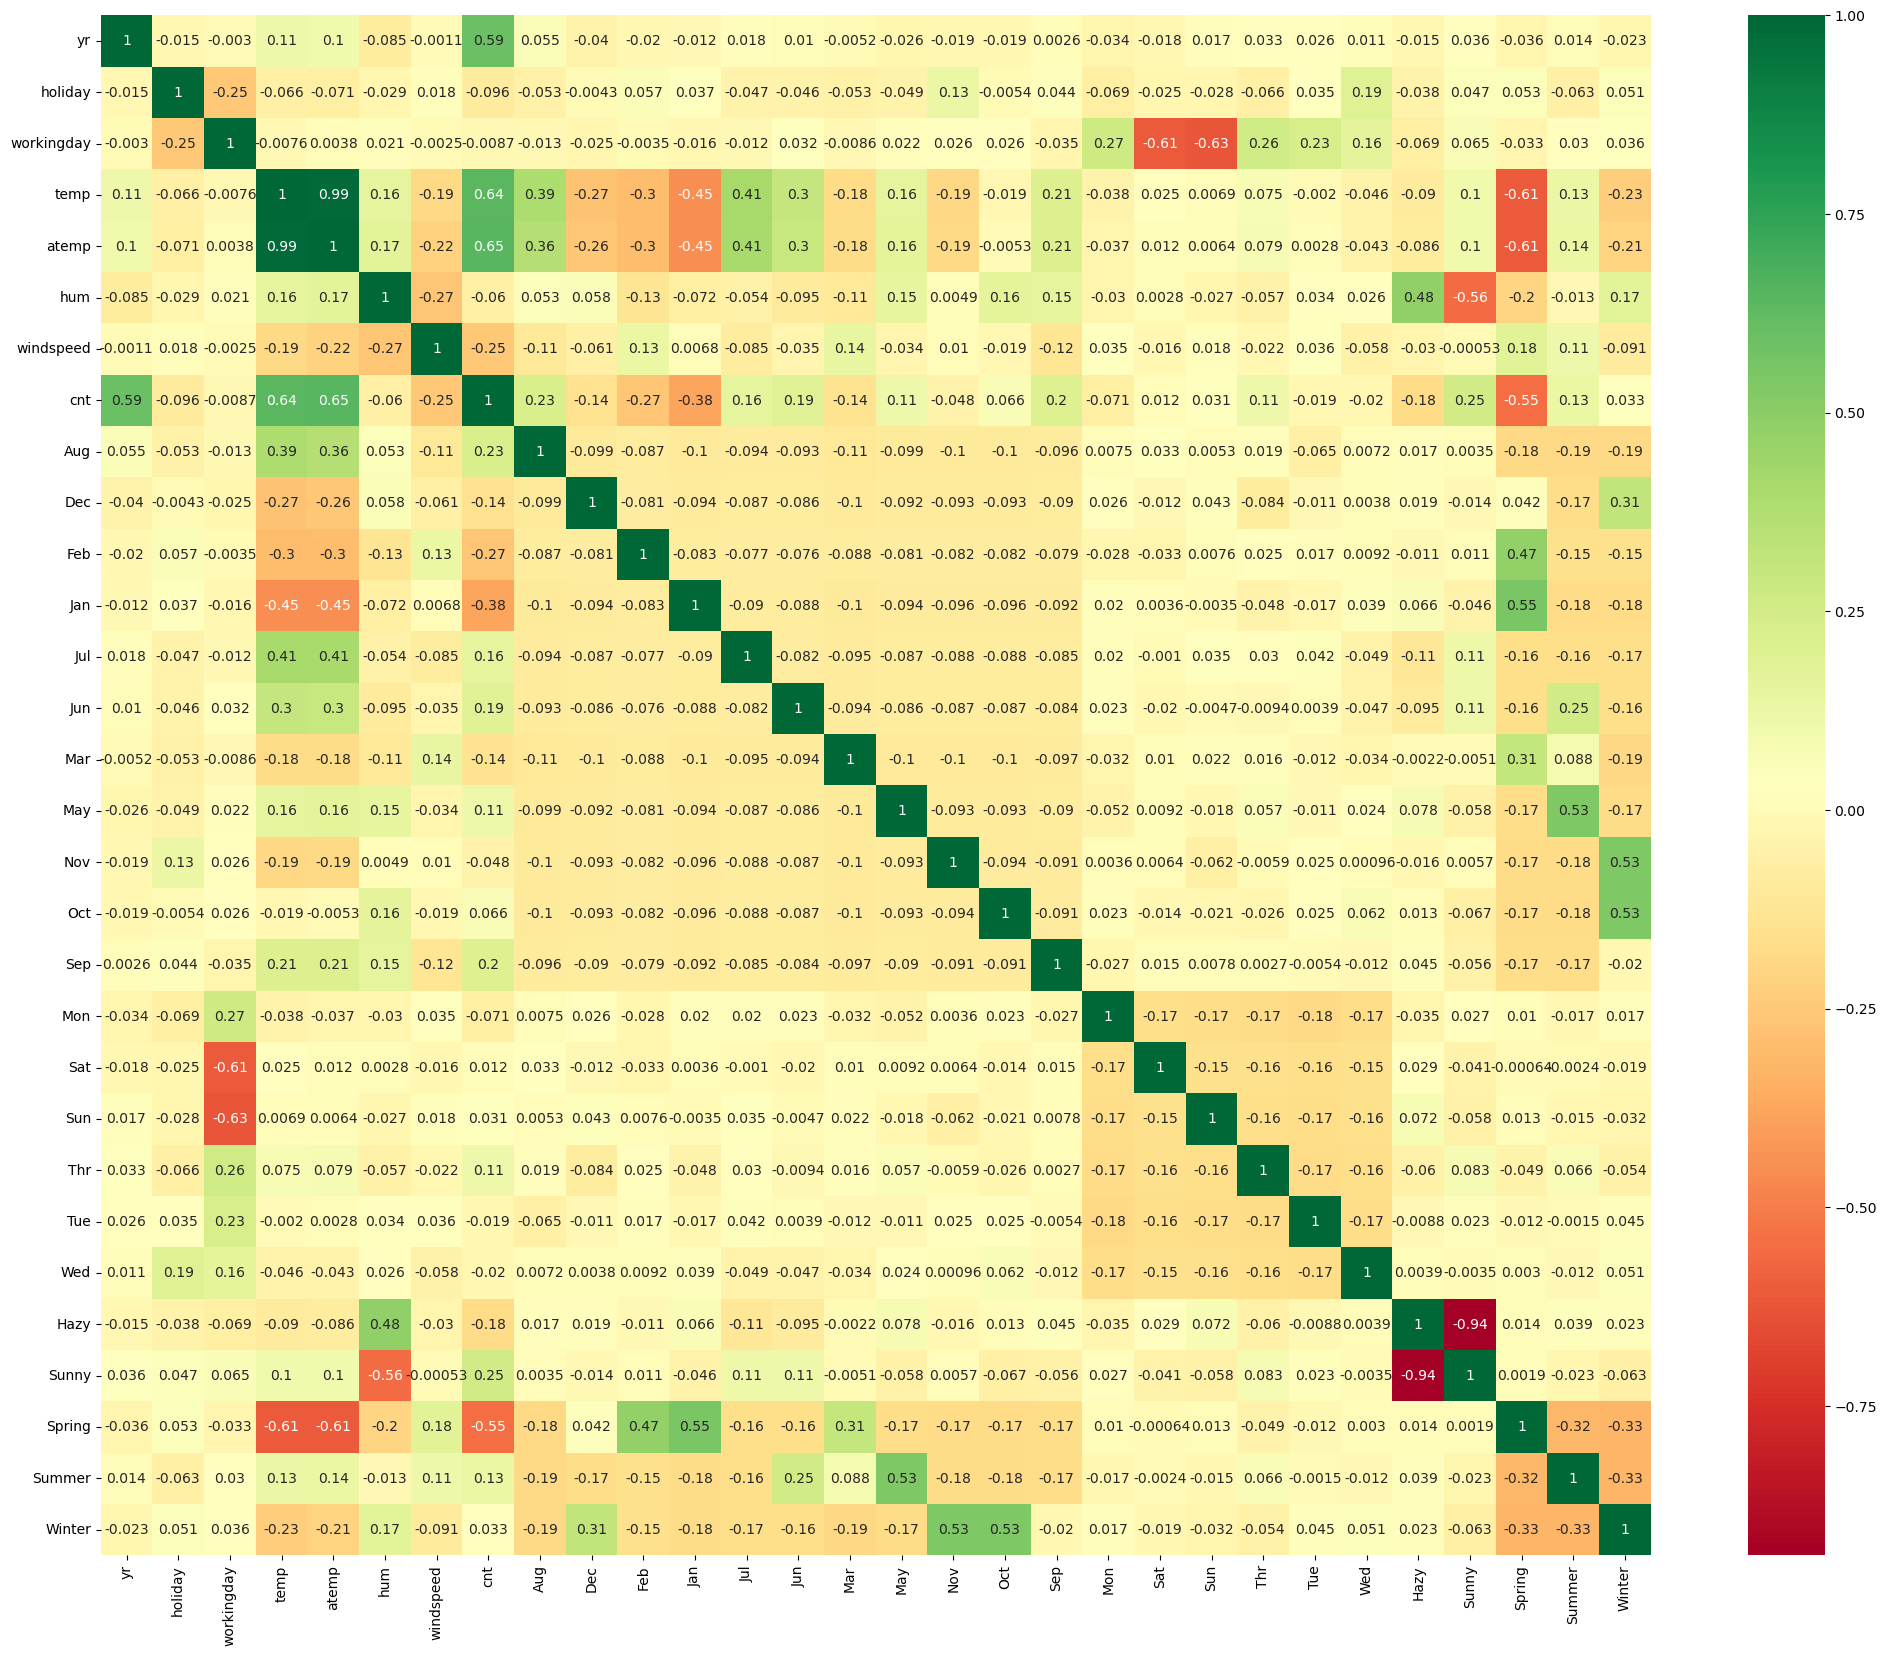

In [44]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

As we have noticed, `temp` seems to the correlated to `cnt` the most. Let's see a pairplot for `temp` vs `cnt`.

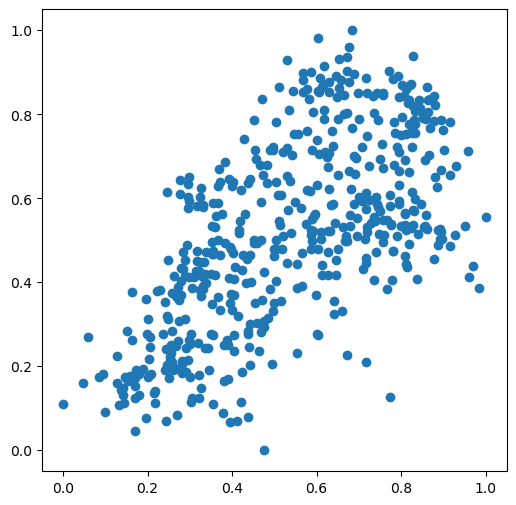

In [45]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

So, we pick `temp` as the first variable and we'll try to fit a regression line to that.

##### Dividing into X and Y sets for the model building

In [46]:
y_train = df_train.pop('cnt')
X_train = df_train

In [47]:
# importing libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [48]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [49]:
# List of variables selected in top 15 list
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thr', False, 13),
 ('Tue', False, 8),
 ('Wed', False, 11),
 ('Hazy', True, 1),
 ('Sunny', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1)]

In [50]:
#Storing the selected variables identified by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Dec', 'Jan', 'Jul', 'Nov',
       'Sep', 'Hazy', 'Sunny', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [51]:
# Viewing the columns that has been rejected
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Mon',
       'Sat', 'Sun', 'Thr', 'Tue', 'Wed'],
      dtype='object')

###### Building model using statsmodel, for the detailed statistics


In [52]:
# Importing library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [53]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[cols]

In [54]:
calculateVIF(X_train_rfe)

,Features,VIF
3,hum,26.36
2,temp,25.12
11,Sunny,15.69
10,Hazy,9.25
12,Spring,5.75
4,windspeed,4.67
14,Winter,4.54
13,Summer,3.28
0,yr,2.10
8,Nov,1.89


Humidity exhibits a notably high Variance Inflation Factor (VIF) value.

### Step 5: Building a linear model

##### Building the 1st model

In [55]:
# Adding a constant variable 
import statsmodels.api as sm
X_train_lm_1 = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train, X_train_lm_1).fit()    # Running the linear model

# Let's see the summary of our linear model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          3.34e-189
Time:                        17:03:24   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0721      0.047      1.519      0.1

In [56]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

# Running the Calculate VIF function for the next model
calculateVIF(X_train_new)

,Features,VIF
10,Sunny,15.68
2,temp,14.00
9,Hazy,8.77
3,windspeed,4.65
11,Spring,4.40
13,Winter,3.36
12,Summer,2.76
0,yr,2.08
7,Nov,1.87
5,Jan,1.74


##### Building the 2nd model

In [57]:
# Adding a constant variable
X_train_lm_2 = sm.add_constant(X_train_new)

lr_2 = sm.OLS(y_train, X_train_lm_2).fit()      # Running the linear model

# Let's see the summary of our linear model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          1.57e-186
Time:                        17:03:24   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0463      0.039     -1.184      0.2

In [58]:
# As sunny shows high VIF values hence we can drop it
X_train_new = X_train_new.drop(['Sunny'], axis = 1)

# Running the Calculate VIF function for the next model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.17
3,windspeed,4.60
10,Spring,2.89
12,Winter,2.88
11,Summer,2.23
0,yr,2.07
7,Nov,1.79
5,Jan,1.66
6,Jul,1.59
9,Hazy,1.54


##### Building the 3rd model

In [59]:
# Adding a constant variable
X_train_lm_3 = sm.add_constant(X_train_new)

lr_3 = sm.OLS(y_train, X_train_lm_3).fit()      # Running the linear model

# Let's see the summary of our linear model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     147.1
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          1.08e-160
Time:                        17:03:24   Log-Likelihood:                 441.37
No. Observations:                 510   AIC:                            -854.7
Df Residuals:                     496   BIC:                            -795.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2198      0.036      6.054      0.0

In [60]:
# We can drop 'Nov' variable as it has high p-value
X_train_new = X_train_new.drop(['Nov'], axis=1)

# Running the Calculate VIF function for the next model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.56
9,Spring,2.89
10,Summer,2.23
0,yr,2.07
11,Winter,2.02
5,Jan,1.65
6,Jul,1.59
8,Hazy,1.54
7,Sep,1.34


##### Building the 4th model

In [61]:
# Adding a constant variable
X_train_lm_4 = sm.add_constant(X_train_new)

lr_4 = sm.OLS(y_train, X_train_lm_4).fit()      # Running the linear model

# Let's see the summary of our linear model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     159.1
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          1.63e-161
Time:                        17:03:25   Log-Likelihood:                 440.69
No. Observations:                 510   AIC:                            -855.4
Df Residuals:                     497   BIC:                            -800.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2094      0.035      5.952      0.0

In [62]:
# We can drop 'Dec' variable as it has high p-value
X_train_new = X_train_new.drop(['Dec'], axis=1)

# Running the Calculate VIF function for the next model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.13
3,windspeed,4.55
8,Spring,2.75
9,Summer,2.22
0,yr,2.07
10,Winter,1.76
4,Jan,1.61
5,Jul,1.59
7,Hazy,1.53
6,Sep,1.33


##### Building the 5th model

In [63]:
# Adding a constant variable
X_train_lm_5 = sm.add_constant(X_train_new)

lr_5 = sm.OLS(y_train, X_train_lm_5).fit()    # Running the linear model

# Let's see the summary of our linear model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     173.5
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          2.01e-162
Time:                        17:03:25   Log-Likelihood:                 440.16
No. Observations:                 510   AIC:                            -856.3
Df Residuals:                     498   BIC:                            -805.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2010      0.034      5.879      0.0

In [64]:
# We can drop 'Jan' variable as it has high p-value
X_train_new = X_train_new.drop(['Jan'], axis=1)

# Running the Calculate VIF function for the next model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.54
8,Summer,2.21
7,Spring,2.08
0,yr,2.06
9,Winter,1.76
4,Jul,1.58
6,Hazy,1.52
5,Sep,1.33
1,holiday,1.04


##### Building the 6th model

In [65]:
# Adding a constant variable
X_train_lm_6 = sm.add_constant(X_train_new)

lr_6 = sm.OLS(y_train,X_train_lm_6).fit()   # Running the linear model

# Let's see the summary of our linear model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     189.9
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          5.44e-163
Time:                        17:03:25   Log-Likelihood:                 438.78
No. Observations:                 510   AIC:                            -855.6
Df Residuals:                     499   BIC:                            -809.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1872      0.033      5.638      0.0

In [66]:
# We can drop 'Spring' variable as it has high p-value
X_train_new = X_train_new.drop(['Spring'], axis = 1)

# Running the Calculate VIF function for the next model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.06
3,windspeed,3.02
0,yr,2.00
7,Summer,1.75
4,Jul,1.52
6,Hazy,1.46
8,Winter,1.43
5,Sep,1.28
1,holiday,1.03


##### Building the 7th model

In [67]:
# Adding a constant variable
X_train_lm_7 = sm.add_constant(X_train_new)

lr_7 = sm.OLS(y_train,X_train_lm_7).fit()    # Running the linear model

# Let's see the summary of our linear model
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     208.1
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          8.29e-163
Time:                        17:03:26   Log-Likelihood:                 435.58
No. Observations:                 510   AIC:                            -851.2
Df Residuals:                     500   BIC:                            -808.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1183      0.019      6.288      0.0

In [68]:
# We can drop 'Jul' variable as it has high p-value
X_train_new = X_train_new.drop(['Jul'], axis = 1)

# Running the Calculate VIF function for the next model
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.68
3,windspeed,2.99
0,yr,1.99
6,Summer,1.56
5,Hazy,1.45
7,Winter,1.35
4,Sep,1.20
1,holiday,1.03


##### Building the 8th model

In [69]:
# Adding a constant variable
X_train_lm_8 = sm.add_constant(X_train_new)

lr_8 = sm.OLS(y_train,X_train_lm_8).fit()    # Running the linear model

# Let's see the summary of our linear model
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     231.8
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          5.28e-163
Time:                        17:03:26   Log-Likelihood:                 433.22
No. Observations:                 510   AIC:                            -848.4
Df Residuals:                     501   BIC:                            -810.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1228      0.019      6.538      0.0

In [70]:
# Checking the parameters obtained
lr_8.params

const        0.122779
yr           0.238520
holiday     -0.085394
temp         0.549761
windspeed   -0.181766
Sep          0.090801
Hazy        -0.066450
Summer       0.086938
Winter       0.116535
dtype: float64

### Step 6: Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [71]:
y_train_pred = lr_8.predict(X_train_lm_8)

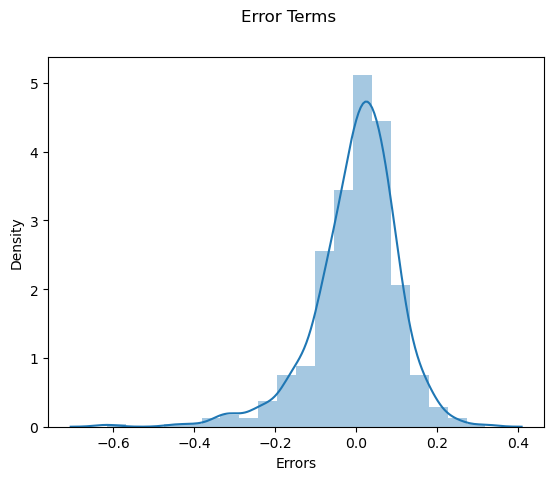

In [72]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms')                  # Plot heading 
plt.xlabel('Errors')                         # X-label
plt.show()

Error terms are following normal distribution

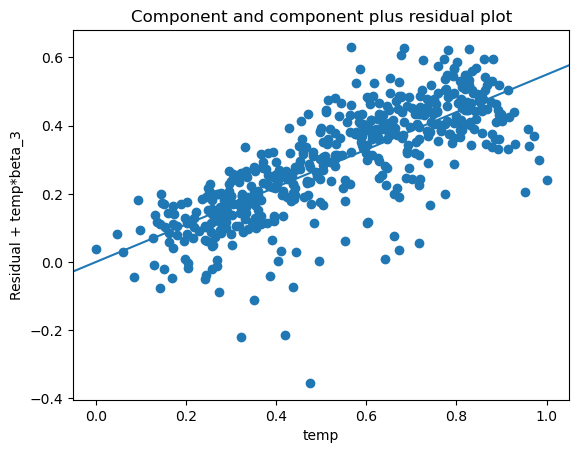

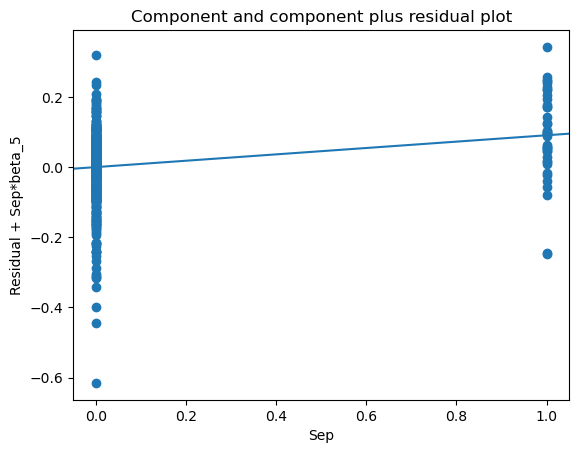

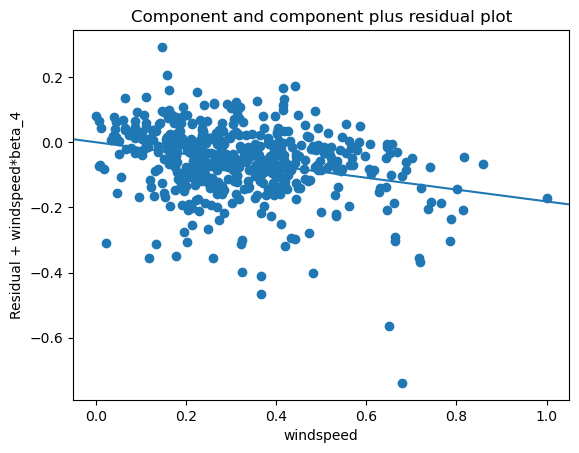

In [73]:
# Plot the Linear relationship validation using CCPR (Component and Component Plus Residual) plot

sm.graphics.plot_ccpr(lr_8, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_8, 'Sep')
plt.show()

sm.graphics.plot_ccpr(lr_8, 'windspeed')
plt.show()

Linearity can be observed from above visualizations.

### Step 7: Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. eighth model.

In [74]:
# Applying the scaling on the test sets

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [75]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thr,Tue,Wed,Hazy,Sunny,Spring,Summer,Winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [76]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [77]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
col1 = X_train_new.columns
X_test = X_test[col1]

# Adding a constant variable 
X_test_lm_8 = sm.add_constant(X_test)

In [78]:
# Making predictions
y_pred = lr_8.predict(X_test_lm_8)

In [79]:
# Calculate the R-squared score on the test set

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.7690313110260333


### Step 8: Model Evaluation
Let's now plot the graph for actual versus predicted values.

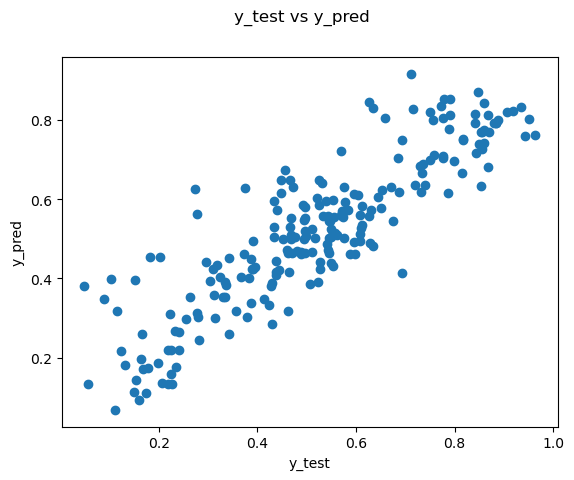

In [80]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred')              # Plot heading 
plt.xlabel('y_test')                          # X-label
plt.ylabel('y_pred')
plt.show()

In [81]:
round(lr_8.params,4)

const        0.1228
yr           0.2385
holiday     -0.0854
temp         0.5498
windspeed   -0.1818
Sep          0.0908
Hazy        -0.0665
Summer       0.0869
Winter       0.1165
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt = 0.1228 + 0.2385  \times  yr - 0.0854 \times holiday + 0.5498 \times temp - 0.1818 \times windspeed + 0.0908 \times Sep - 0.0665 \times Hazy + 0.086 \times Summer + 0.1165 \times Winter $

In [82]:
# Calculating Adjusted-R^2 value for the test dataset

adjustedR2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjustedR2)

0.7602


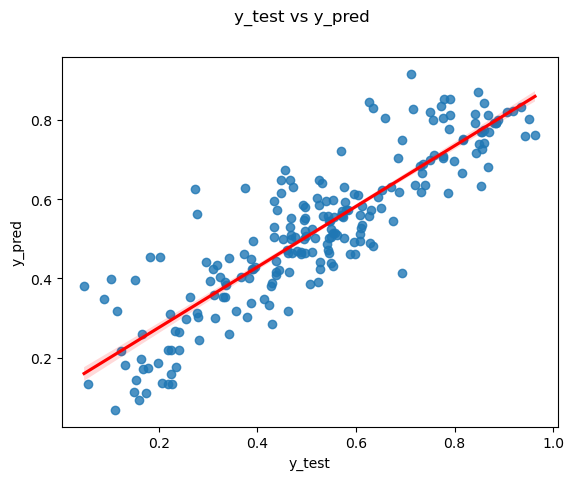

In [83]:
# Visualizing the fit on the test data by plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True, line_kws={"color": "red"})
plt.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

### Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.787
- Test dataset R^2           : 0.769
- Train dataset Adjusted R^2 : 0.784 
- Test dataset Adjusted R^2  : 0.7602
##### Demand of bikes depend on columns i.e., yr, holiday, temp, windspeed, Sep, Hazy, Summer and Winter.